In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score


In [4]:
df = pd.read_csv("car data.csv")

In [5]:
# Display first rows
print(df.head())


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [6]:
# Drop car name column
df.drop('Car_Name', axis=1, inplace=True)

In [7]:
# Convert categorical columns using one-hot encoding
df = pd.get_dummies(df, drop_first=True)


In [8]:
# Features and target
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']


In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
# Model training
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
# Predictions
y_pred = model.predict(X_test)


In [15]:
# Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))


MAE: 1.2163740193336867


In [16]:
print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 3.4813498305149064


In [17]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


RMSE: 1.865837568095065


In [18]:
print("R2 Score:", r2_score(y_test, y_pred))


R2 Score: 0.8488707839191814


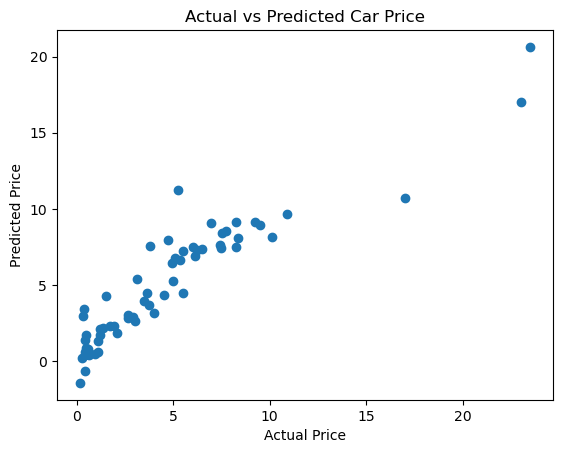

In [19]:
# Visualization
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Price")
plt.show()